In [2]:
# For data manipulation
import pandas as pd

# for scientific computation
import numpy as np

# for data analysis
from sklearn import linear_model
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt

# For serialization and deserialization of data from/to file
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PowerTransformer

In [20]:
#Import the china gdp data
df = pd.read_csv("../../../../soft2022spring-DS/Data/china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [21]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


## Linear regression model

In [22]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [23]:
# Split into the training set and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
# creating Linear Regression model
linreg = LinearRegression()

# fitting the model to our data
linreg.fit(X, y)

LinearRegression()

In [25]:
y_predicted = linreg.predict(X)
y_predicted

array([-1.61287007e+12, -1.49991037e+12, -1.38695067e+12, -1.27399097e+12,
       -1.16103127e+12, -1.04807157e+12, -9.35111873e+11, -8.22152173e+11,
       -7.09192474e+11, -5.96232774e+11, -4.83273075e+11, -3.70313376e+11,
       -2.57353676e+11, -1.44393977e+11, -3.14342771e+10,  8.15254223e+10,
        1.94485122e+11,  3.07444821e+11,  4.20404521e+11,  5.33364220e+11,
        6.46323920e+11,  7.59283619e+11,  8.72243319e+11,  9.85203018e+11,
        1.09816272e+12,  1.21112242e+12,  1.32408212e+12,  1.43704182e+12,
        1.55000152e+12,  1.66296121e+12,  1.77592091e+12,  1.88888061e+12,
        2.00184031e+12,  2.11480001e+12,  2.22775971e+12,  2.34071941e+12,
        2.45367911e+12,  2.56663881e+12,  2.67959851e+12,  2.79255821e+12,
        2.90551791e+12,  3.01847761e+12,  3.13143731e+12,  3.24439701e+12,
        3.35735671e+12,  3.47031641e+12,  3.58327611e+12,  3.69623581e+12,
        3.80919550e+12,  3.92215520e+12,  4.03511490e+12,  4.14807460e+12,
        4.26103430e+12,  

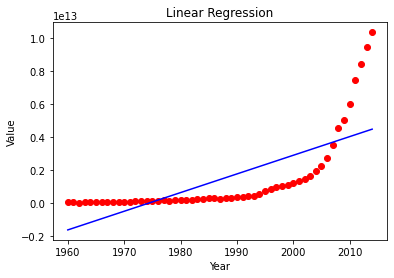

In [26]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='red')
plt.plot(X, y_predicted, color='blue')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

## Polynomial Regression model

In [52]:
# polynomial regression model
polyreg = PolynomialFeatures(degree=4)

# transform my train data to adjust the polynom to linear regression model
X_pol = polyreg.fit_transform(X)

In [53]:
# create linear regression model
pollinreg = LinearRegression()
pollinreg.fit(X_pol, y)

LinearRegression()

In [54]:
# apply the model on my train data
y_predicted = pollinreg.predict(X_pol)

In [55]:
y_predicted

array([-6.99853198e+11, -4.62561521e+11, -2.55301573e+11, -7.64771851e+10,
        7.55103016e+10,  2.02262030e+11,  3.05381631e+11,  3.86475226e+11,
        4.47151415e+11,  4.89021294e+11,  5.13698441e+11,  5.22798921e+11,
        5.17941289e+11,  5.00746586e+11,  4.72838336e+11,  4.35842556e+11,
        3.91387745e+11,  3.41104893e+11,  2.86627476e+11,  2.29591454e+11,
        1.71635276e+11,  1.14399881e+11,  5.95286901e+10,  8.66761414e+09,
       -3.65349510e+10, -7.44281186e+10, -1.03358519e+11, -1.21670294e+11,
       -1.27705097e+11, -1.19802098e+11, -9.62979759e+10, -5.55269244e+10,
        4.17934842e+09,  8.44916234e+10,  1.87083168e+11,  3.13629736e+11,
        4.65809570e+11,  6.45303398e+11,  8.53794433e+11,  1.09296838e+12,
        1.36451343e+12,  1.67012025e+12,  2.01148201e+12,  2.39029437e+12,
        2.80825545e+12,  3.26706588e+12,  3.76842877e+12,  4.31404973e+12,
        4.90563684e+12,  5.54490066e+12,  6.23355426e+12,  6.97331318e+12,
        7.76589547e+12,  

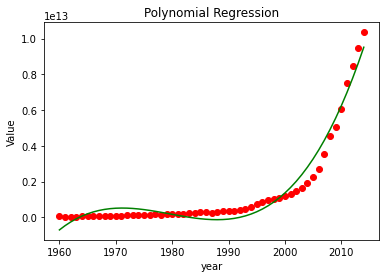

In [56]:
# Visualise the Polymonial Regression results
plt.title('Polynomial Regression')
plt.scatter(X, y, color='red')
plt.plot(X, y_predicted, color='green')
plt.xlabel('year')
plt.ylabel('Value')
plt.show()

In [32]:
print("Multiple Regression Performance")

# The coefficients
print('Coefficient: ', pollinreg.coef_)
print('Intercept: ', pollinreg.intercept_)

Multiple Regression Performance
Coefficient:  [ 0.00000000e+00  6.09990908e+08  8.12114089e+11 -5.47014400e+08
  1.03625129e+05]
Intercept:  -5.30343075581971e+17


## Test and Compare the Models

In [70]:
# Predicting the same with Polymonial Regression
result2010 = pollinreg.predict(polyreg.fit_transform([[2010]]))[0]
print("prediction 2010:", result2010)

prediction 2010: 6233554257856.0


In [71]:
# the second test
result2020 = pollinreg.predict(polyreg.fit_transform([[2020]]))[0]
print("prediction 2020:", result2020)

prediction 2020: 16215179325376.0


In [72]:
# the third test
result2022 = pollinreg.predict(polyreg.fit_transform([[2022]]))[0]
print("prediction 2022:", result2022)

prediction 2022: 18976748520384.0


## Assess the Model

In [73]:
# RMSE (Root mean squared error) answers the question: "How similar, on average, are the numbers in list1 to list2?"  
rmse = np.sqrt(sm.mean_squared_error(y, y_predicted))
r2 = sm.r2_score(y, y_predicted)
print("rmse:", rmse)
print("r2:", round(r2,2))

rmse: 462654777558.25214
r2: 0.97


### What type/s of regression have you applied?
- We started applying a Linear regression, but it dit not fit at all, then we applied a polynominal regression in a linear model, because we only have one dependent variable (Value) on year.  

### Which were the challenges?
- Since our dependent varibale has huge numbers, we could not calculate our own function, to apply regression and rmse. We had to apply libraries from sklearn. Using training data, we had trouble appliying polynomial regression.

### How accurate is your solution?
- Our RMSE i 462654777558.25214 and R2 is 0.96, which means that our model i 97% accurate!

### What else could be done for improvement of the accuracy?
- By using a training set, and applying our model to a test set, we could test our model even better. However, due to challenges in using a polynomial regression on a training set, we have not done this. Did we perhaps overfit our model by not testing it on a test set?